In [75]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for PC
mpl.rc('font',family='MS Gothic')

In [76]:

hiroshimamesh1 = gpd.read_file('data/SDDSWS5132.zip')
hiroshimamesh2 = gpd.read_file('data/SDDSWS5133.zip')
hiroshimamesh3 = gpd.read_file('data/SDDSWS5232.zip')
hiroshimamesh4 = gpd.read_file('data/SDDSWS5233.zip')

In [77]:
hiroshimamesh = gpd.pd.concat([hiroshimamesh1, hiroshimamesh2, hiroshimamesh3, hiroshimamesh4])

<Axes: >

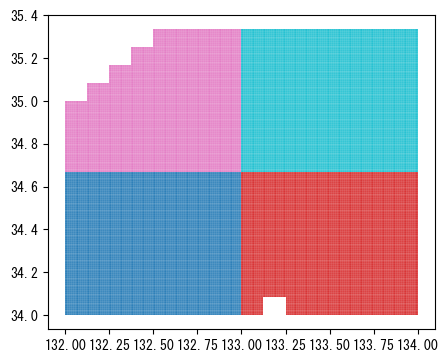

In [78]:
hiroshimamesh.plot(figsize=(5,5),edgecolor='white',linewidth=0.1,column='MESH1_ID')

In [79]:
hiroshimamesh.head()

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry
0,51320000,5132,00,00,1,"POLYGON ((132.01250 34.00000, 132.00000 34.000..."
1,51320001,5132,00,01,2,"POLYGON ((132.02500 34.00000, 132.01250 34.000..."
2,51320002,5132,00,02,3,"POLYGON ((132.03750 34.00000, 132.02500 34.000..."
3,51320003,5132,00,03,4,"POLYGON ((132.05000 34.00000, 132.03750 34.000..."
4,51320004,5132,00,04,5,"POLYGON ((132.06250 34.00000, 132.05000 34.000..."


In [80]:
hiroshimadata1 = pd.read_csv('data/tblT001100S5132.zip', encoding='cp932')
hiroshimadata2 = pd.read_csv('data/tblT001100S5133.zip', encoding='cp932')
hiroshimadata3 = pd.read_csv('data/tblT001100S5232.zip', encoding='cp932')
hiroshimadata4 = pd.read_csv('data/tblT001100S5233.zip', encoding='cp932')


In [81]:
hiroshimadata1.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
0,NaN,NaN,NaN,NaN,人口（総数）,人口（総数） 男,人口（総数） 女,０～１４歳人口 総数,０～１４歳人口 男,０～１４歳人口 女,...,６人世帯数 一般世帯数,７人以上世帯数 一般世帯数,親族のみの世帯数 一般世帯数,核家族世帯数 一般世帯数,核家族以外の世帯数 一般世帯数,６歳未満世帯員のいる世帯数 一般世帯数,６５歳以上世帯員のいる世帯数 一般世帯数,世帯主の年齢が２０～２９歳の１人世帯数 一般世帯数,高齢単身世帯数 一般世帯数,高齢夫婦世帯数 一般世帯数
1,51320000.0,0.0,NaN,NaN,158,78,80,11,6,5,...,3,0,48,39,9,4,51,0,12,17
2,51320001.0,0.0,NaN,NaN,36,22,14,0,0,0,...,0,0,12,11,1,0,11,0,3,4
3,51320002.0,0.0,NaN,NaN,18,7,11,0,0,0,...,0,0,7,6,1,0,8,0,2,3
4,51320003.0,0.0,NaN,NaN,54,33,21,5,3,2,...,1,0,13,10,3,1,13,0,4,2


In [82]:
hiroshimadata1 = hiroshimadata1[1:]
hiroshimadata2 = hiroshimadata2[1:]
hiroshimadata3 = hiroshimadata3[1:]
hiroshimadata4 = hiroshimadata4[1:]

In [83]:
hiroshimadata1 = hiroshimadata1.replace('*',np.nan)
hiroshimadata2 = hiroshimadata2.replace('*',np.nan)
hiroshimadata3 = hiroshimadata3.replace('*',np.nan)
hiroshimadata4 = hiroshimadata4.replace('*',np.nan) 

In [84]:
hiroshimadata1

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,51320000.0,0.0,NaN,NaN,158,78,80,11,6,5,...,3,0,48,39,9,4,51,0,12,17
2,51320001.0,0.0,NaN,NaN,36,22,14,0,0,0,...,0,0,12,11,1,0,11,0,3,4
3,51320002.0,0.0,NaN,NaN,18,7,11,0,0,0,...,0,0,7,6,1,0,8,0,2,3
4,51320003.0,0.0,NaN,NaN,54,33,21,5,3,2,...,1,0,13,10,3,1,13,0,4,2
5,51320004.0,2.0,51320014.0,NaN,4,1,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,51327794.0,0.0,NaN,NaN,52,21,31,6,1,5,...,0,2,16,14,2,2,22,0,6,11
3107,51327795.0,1.0,NaN,51327784,16,5,11,4,2,2,...,1,0,5,3,2,2,4,4,0,2
3108,51327796.0,0.0,NaN,NaN,56,25,31,1,0,1,...,0,0,20,17,3,1,20,0,4,9
3109,51327797.0,0.0,NaN,NaN,21,11,10,3,3,0,...,0,1,5,2,3,0,6,0,1,1


In [85]:
hiroshimadata = pd.concat([hiroshimadata1, hiroshimadata2, hiroshimadata3, hiroshimadata4])

In [86]:
hiroshimadata.info

<bound method DataFrame.info of         KEY_CODE  HTKSYORI     HTKSAKI             GASSAN T001100001  \
1     51320000.0       0.0         NaN                NaN        158   
2     51320001.0       0.0         NaN                NaN         36   
3     51320002.0       0.0         NaN                NaN         18   
4     51320003.0       0.0         NaN                NaN         54   
5     51320004.0       2.0  51320014.0                NaN          4   
...          ...       ...         ...                ...        ...   
3984  52337777.0       1.0         NaN  52337769;52337779         15   
3985  52337779.0       2.0  52337777.0                NaN          4   
3986  52337781.0       0.0         NaN                NaN         28   
3987  52337786.0       1.0         NaN  52337776;52337797         25   
3988  52337797.0       2.0  52337786.0                NaN          4   

     T001100002 T001100003 T001100004 T001100005 T001100006  ... T001100041  \
1            78         

In [87]:
hiroshimadata.columns

Index(['KEY_CODE', 'HTKSYORI', 'HTKSAKI', 'GASSAN', 'T001100001', 'T001100002',
       'T001100003', 'T001100004', 'T001100005', 'T001100006', 'T001100007',
       'T001100008', 'T001100009', 'T001100010', 'T001100011', 'T001100012',
       'T001100013', 'T001100014', 'T001100015', 'T001100016', 'T001100017',
       'T001100018', 'T001100019', 'T001100020', 'T001100021', 'T001100022',
       'T001100023', 'T001100024', 'T001100025', 'T001100026', 'T001100027',
       'T001100028', 'T001100029', 'T001100030', 'T001100031', 'T001100032',
       'T001100033', 'T001100034', 'T001100035', 'T001100036', 'T001100037',
       'T001100038', 'T001100039', 'T001100040', 'T001100041', 'T001100042',
       'T001100043', 'T001100044', 'T001100045', 'T001100046', 'T001100047',
       'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [88]:
hiroshimadata.columns[4:]

Index(['T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [89]:
hiroshimadata[hiroshimadata.columns[1:]]

,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,0.0,NaN,NaN,158,78,80,11,6,5,147,...,3,0,48,39,9,4,51,0,12,17
2,0.0,NaN,NaN,36,22,14,0,0,0,36,...,0,0,12,11,1,0,11,0,3,4
3,0.0,NaN,NaN,18,7,11,0,0,0,18,...,0,0,7,6,1,0,8,0,2,3
4,0.0,NaN,NaN,54,33,21,5,3,2,49,...,1,0,13,10,3,1,13,0,4,2
5,2.0,51320014.0,NaN,4,1,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3984,1.0,NaN,52337769;52337779,15,6,9,0,0,0,21,...,1,0,3,1,2,0,9,0,6,1
3985,2.0,52337777.0,NaN,4,3,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3986,0.0,NaN,NaN,28,16,12,3,2,1,25,...,0,1,7,5,2,1,9,0,2,3
3987,1.0,NaN,52337776;52337797,25,11,14,0,0,0,35,...,1,0,9,7,2,0,14,0,7,4


In [90]:
hiroshimadata[hiroshimadata.columns[4:]].astype(float)

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,158.0,78.0,80.0,11.0,6.0,5.0,147.0,72.0,75.0,71.0,...,3.0,0.0,48.0,39.0,9.0,4.0,51.0,0.0,12.0,17.0
2,36.0,22.0,14.0,0.0,0.0,0.0,36.0,22.0,14.0,20.0,...,0.0,0.0,12.0,11.0,1.0,0.0,11.0,0.0,3.0,4.0
3,18.0,7.0,11.0,0.0,0.0,0.0,18.0,7.0,11.0,5.0,...,0.0,0.0,7.0,6.0,1.0,0.0,8.0,0.0,2.0,3.0
4,54.0,33.0,21.0,5.0,3.0,2.0,49.0,30.0,19.0,29.0,...,1.0,0.0,13.0,10.0,3.0,1.0,13.0,0.0,4.0,2.0
5,4.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3984,15.0,6.0,9.0,0.0,0.0,0.0,21.0,11.0,10.0,7.0,...,1.0,0.0,3.0,1.0,2.0,0.0,9.0,0.0,6.0,1.0
3985,4.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3986,28.0,16.0,12.0,3.0,2.0,1.0,25.0,14.0,11.0,10.0,...,0.0,1.0,7.0,5.0,2.0,1.0,9.0,0.0,2.0,3.0
3987,25.0,11.0,14.0,0.0,0.0,0.0,35.0,16.0,19.0,16.0,...,1.0,0.0,9.0,7.0,2.0,0.0,14.0,0.0,7.0,4.0


In [91]:
hiroshimadata[hiroshimadata.columns[4:]].astype(float)

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,158.0,78.0,80.0,11.0,6.0,5.0,147.0,72.0,75.0,71.0,...,3.0,0.0,48.0,39.0,9.0,4.0,51.0,0.0,12.0,17.0
2,36.0,22.0,14.0,0.0,0.0,0.0,36.0,22.0,14.0,20.0,...,0.0,0.0,12.0,11.0,1.0,0.0,11.0,0.0,3.0,4.0
3,18.0,7.0,11.0,0.0,0.0,0.0,18.0,7.0,11.0,5.0,...,0.0,0.0,7.0,6.0,1.0,0.0,8.0,0.0,2.0,3.0
4,54.0,33.0,21.0,5.0,3.0,2.0,49.0,30.0,19.0,29.0,...,1.0,0.0,13.0,10.0,3.0,1.0,13.0,0.0,4.0,2.0
5,4.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3984,15.0,6.0,9.0,0.0,0.0,0.0,21.0,11.0,10.0,7.0,...,1.0,0.0,3.0,1.0,2.0,0.0,9.0,0.0,6.0,1.0
3985,4.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3986,28.0,16.0,12.0,3.0,2.0,1.0,25.0,14.0,11.0,10.0,...,0.0,1.0,7.0,5.0,2.0,1.0,9.0,0.0,2.0,3.0
3987,25.0,11.0,14.0,0.0,0.0,0.0,35.0,16.0,19.0,16.0,...,1.0,0.0,9.0,7.0,2.0,0.0,14.0,0.0,7.0,4.0


In [92]:
hiroshimadata.info

<bound method DataFrame.info of         KEY_CODE  HTKSYORI     HTKSAKI             GASSAN T001100001  \
1     51320000.0       0.0         NaN                NaN        158   
2     51320001.0       0.0         NaN                NaN         36   
3     51320002.0       0.0         NaN                NaN         18   
4     51320003.0       0.0         NaN                NaN         54   
5     51320004.0       2.0  51320014.0                NaN          4   
...          ...       ...         ...                ...        ...   
3984  52337777.0       1.0         NaN  52337769;52337779         15   
3985  52337779.0       2.0  52337777.0                NaN          4   
3986  52337781.0       0.0         NaN                NaN         28   
3987  52337786.0       1.0         NaN  52337776;52337797         25   
3988  52337797.0       2.0  52337786.0                NaN          4   

     T001100002 T001100003 T001100004 T001100005 T001100006  ... T001100041  \
1            78         

In [93]:
hiroshimamesh['KEY_CODE']=hiroshimamesh['KEY_CODE'].astype(float)

In [94]:
hiroshimamesh = hiroshimamesh.merge(hiroshimadata, on='KEY_CODE')

In [95]:
hiroshimamesh.sample(5)

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,HTKSYORI,HTKSAKI,GASSAN,T001100001,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
2777,51327341.0,5132,73,41,5942,"POLYGON ((132.40000 34.61667, 132.38750 34.616...",1.0,NaN,51327330,35,...,0,1,11,9,2,1,13,0,4,2
2618,51326744.0,5132,67,44,5545,"POLYGON ((132.93750 34.53333, 132.92500 34.533...",0.0,NaN,NaN,55,...,0,0,17,10,7,0,18,0,3,6
3261,51330648.0,5133,06,48,549,"POLYGON ((133.86250 34.03333, 133.85000 34.033...",1.0,NaN,51330657,455,...,6,2,140,112,28,10,137,1,36,45
11484,52333125.0,5233,31,25,2526,"POLYGON ((133.20000 34.93333, 133.18750 34.933...",0.0,NaN,NaN,33,...,0,1,9,6,3,0,13,0,4,4
7420,52322085.0,5232,20,85,1686,"POLYGON ((132.07500 34.90000, 132.06250 34.900...",0.0,NaN,NaN,1013,...,3,1,149,139,10,31,105,52,38,32


In [96]:
hiroshimamesh = hiroshimamesh.to_crs(3857)

<Axes: >

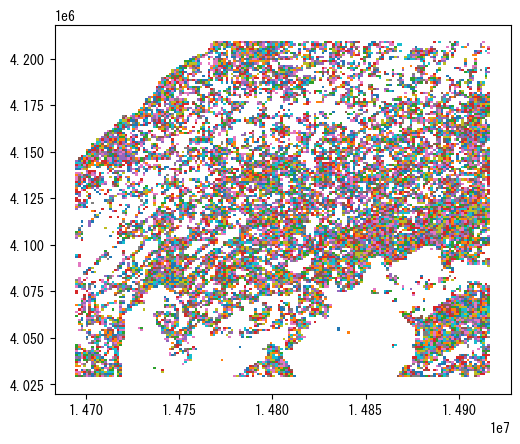

In [97]:
hiroshimamesh.plot(column='T001100001')

TypeError: Legend.__init__() got an unexpected keyword argument 'shrink'

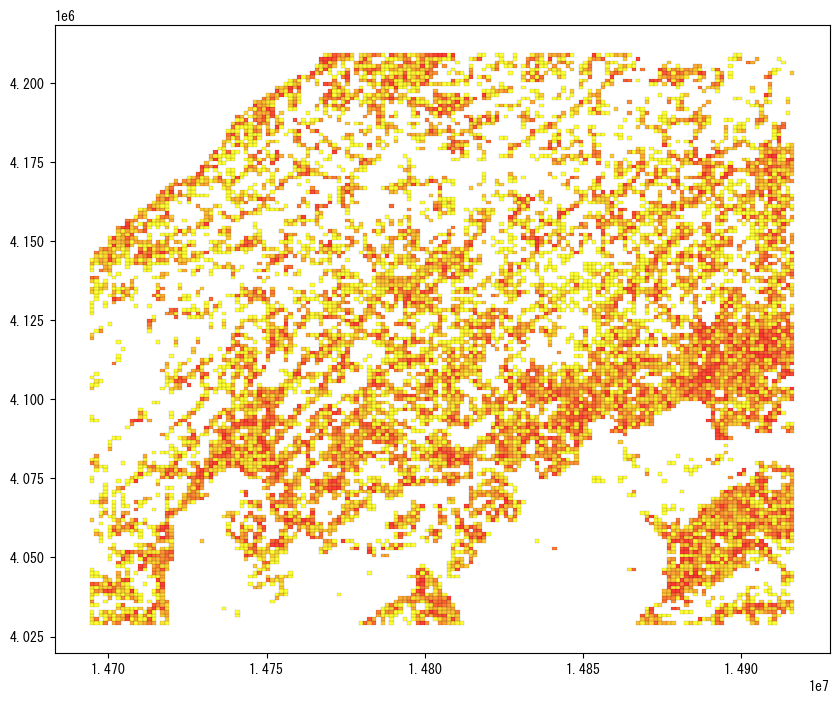

In [102]:
# 人口マップ
fig, ax = plt.subplots(figsize=(10,10))

hiroshimamesh.plot(ax=ax,
         column='T001100004',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
        #  vmax=3000,
         legend_kwds={'shrink': "０～１４歳人口　総数人",'shrink': 0.6, 'orientation': "horizontal", 'pad': 0.01}
)

# マップの範囲を chibamesh の境界に設定
ax.set_xlim(hiroshimamesh.total_bounds[0], hiroshimamesh.total_bounds[2])
ax.set_ylim(hiroshimamesh.total_bounds[1], hiroshimamesh.total_bounds[3])

# 軸を非表示にする
ax.axis('off')

# タイトル
ax.set_title('０～１４歳人口　総数人',fontsize=24,pad=20);

# ベースマップを追加
cx.add_basemap(ax,source='https://cyberjapandata.gsi.go.jp/xyz/pale/{z}/{x}/{y}.png')

In [101]:
hiroshimamesh['Percent0_14'] = hiroshimamesh['T001100004'] / hiroshimamesh['T001100001']*100

# コロプレスマップをプロットする
fig, ax = plt.subplots(figsize=(10, 10))

hiroshimamesh.plot(ax=ax,
               column='Percent0_14',
               legend=True,
               cmap='RdYlGn_r',
               edgecolor='black',
               linewidth=0.1,
               alpha=0.8,
               vmax=20,
               legend_kwds={'label': '０～１４歳人口　総数人％', 'shrink': 0.6, 'orientation': 'horizontal', 'pad': 0.01}
              )

# マップの範囲を chibamesh の境界に設定する
ax.set_xlim(hiroshimamesh.total_bounds[0], hiroshimamesh.total_bounds[2])
ax.set_ylim(hiroshimamesh.total_bounds[1], hiroshimamesh.total_bounds[3])

# 軸を非表示にする
ax.axis('off')

# タイトルを設定する
ax.set_title('０～１４歳の子供はどこにいるの？', fontsize=24, pad=20)

# ベースマップを追加する
cx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/pale/{z}/{x}/{y}.png')

TypeError: unsupported operand type(s) for /: 'str' and 'str'